In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [3]:
customers

,customer_id,name
0,1,Alice
1,2,Bob
2,3,Tom
3,4,Jerry
4,5,John


In [4]:
orders

,order_id,order_date,customer_id,product_id
0,1,7/31/20,1,1
1,2,7/30/20,2,2
2,3,8/29/20,3,3
3,4,7/29/20,4,1
4,5,6/10/20,1,2
5,6,8/1/20,2,1
6,7,8/1/20,3,3
7,8,8/3/20,1,2
8,9,8/7/20,2,3
9,10,7/15/20,1,2


In [6]:
products.head()

,product_id,product_name,price
0,1.0,keyboard,120.0
1,2.0,mouse,80.0
2,3.0,screen,600.0
3,4.0,hard disk,450.0
4,NaN,NaN,NaN


In [28]:
merge = pd.merge(customers,orders, on ='customer_id').merge(products,on = 'product_id')
# merge = merge.groupby(['customer_id','product_id','product_name'], as_index = False).order_id.count()
merge.sort_values(['customer_id','product_id'])

,customer_id,name,order_id,order_date,product_id,product_name,price
0,1,Alice,1,7/31/20,1,keyboard,120.0
3,1,Alice,5,6/10/20,2,mouse,80.0
4,1,Alice,8,8/3/20,2,mouse,80.0
5,1,Alice,10,7/15/20,2,mouse,80.0
1,2,Bob,6,8/1/20,1,keyboard,120.0
6,2,Bob,2,7/30/20,2,mouse,80.0
7,2,Bob,9,8/7/20,3,screen,600.0
8,3,Tom,3,8/29/20,3,screen,600.0
9,3,Tom,7,8/1/20,3,screen,600.0
2,4,Jerry,4,7/29/20,1,keyboard,120.0


In [29]:
# customer_id | product_id | product_name 
merge = merge.groupby(['customer_id','product_id','product_name'], as_index = False).order_id.count()
merge['rank'] = merge.groupby(['customer_id']).order_id.rank(method='dense',ascending = 0)

res = merge.query('rank == 1')[['customer_id','product_id','product_name']]
res

,customer_id,product_id,product_name
1,1,2,mouse
2,2,1,keyboard
3,2,2,mouse
4,2,3,screen
5,3,3,screen
6,4,1,keyboard


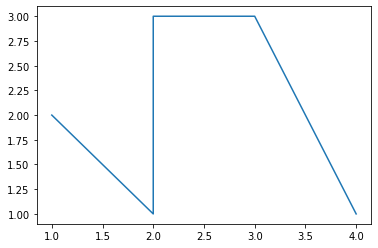

In [30]:
plt.figure()
plt.plot(res['customer_id'],res['product_id'])
plt.show()